In [3]:
#imports 
from qutip import *
import matplotlib.pyplot as plt
import numpy as np 
import random as rand

In [15]:
def pauliTWIRLalt(rhoI, unitary, probs, n=0,):
    gates = [] 
    lhsEC = qeye(2) 
    combo_gate = qeye(2)
    for i in range(n): 
        gates += rand.choices(population=[qeye(2), sigmax(), sigmay(), sigmaz()], weights=[probs['Pi'], probs['Px'],probs['Py'],probs['Pz']], k=1)
    
    for g in gates: 
        combo_gate = combo_gate * g
        lhsEC = unitary * g * lhsEC 
    return combo_gate * lhsEC * rhoI * lhsEC.dag() * combo_gate.dag()

pauliTWIRLalt(basis(2,0)*basis(2,0).dag(), (-1j * (0.01) * sigmax()).expm(), probs={'Px' : 0.25, 'Py' : 0.25, 'Pi' : 0.25,'Pz' : 0.25}, n=5000)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.20257776e-29]]

'\npauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={\'Px\' : 0.25,\n               \'Py\' : 0.25,\n               \'Pi\' : 0.25,\n               \'Pz\' : 0.25}, \n               t=24, proj_basis="X")\npauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={\'Px\' : 0.25,\n               \'Py\' : 0.25,\n               \'Pi\' : 0.25,\n               \'Pz\' : 0.25}, \n               t=24, proj_basis="Y")\n\npauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.8) * sigmax()).expm(), probs={\'Px\' : 0.25,\n               \'Py\' : 0.25,\n               \'Pi\' : 0.25,\n               \'Pz\' : 0.25}, \n               t=24, proj_basis="Z")\npauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.08) * sigmax()).expm(), probs={\'Px\' : 0.25,\n               \'Py\' : 0.25,\n               \'Pi\' : 0.25,\n               \'Pz\' : 0.25}, \n               t=24, proj_basis="Z")\npauli_twirl_plot(basis(2,0) * basis(2,0).dag()

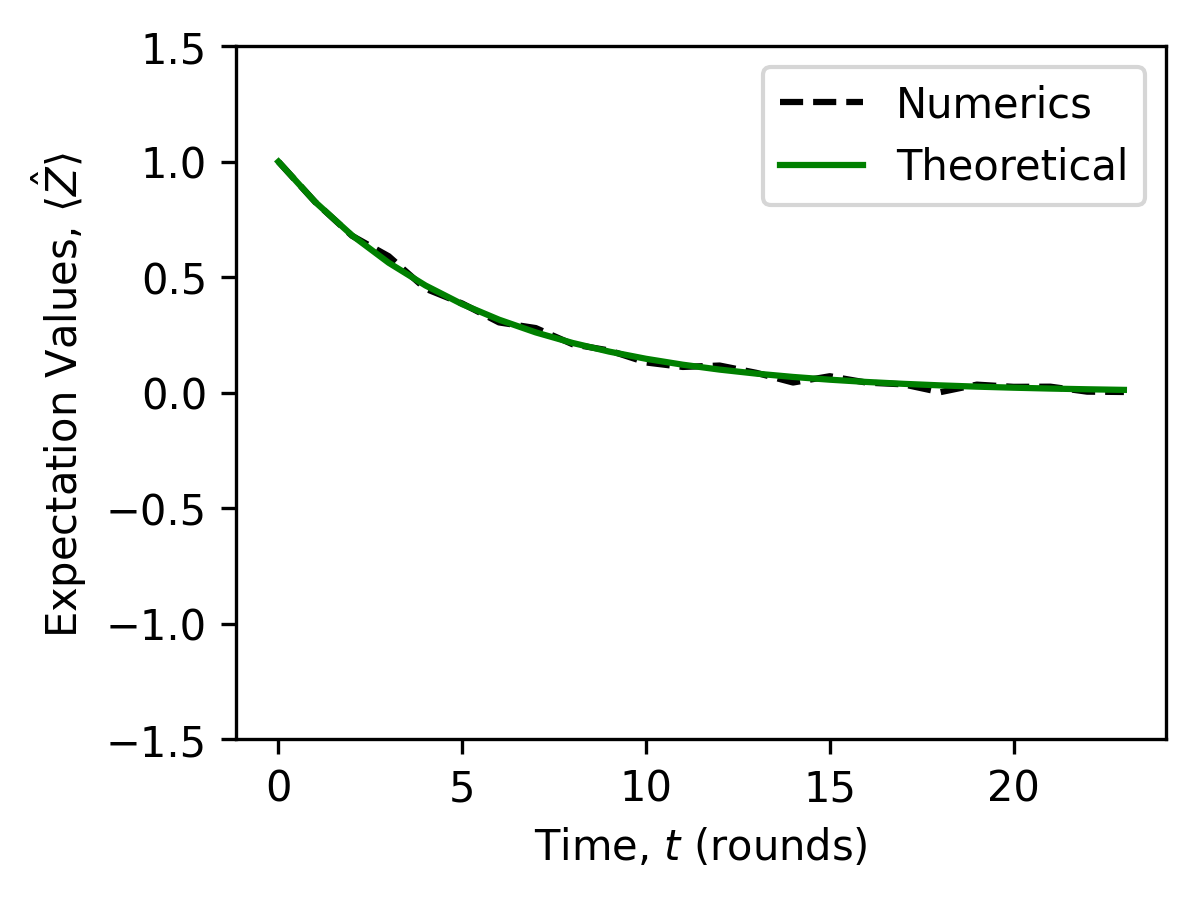

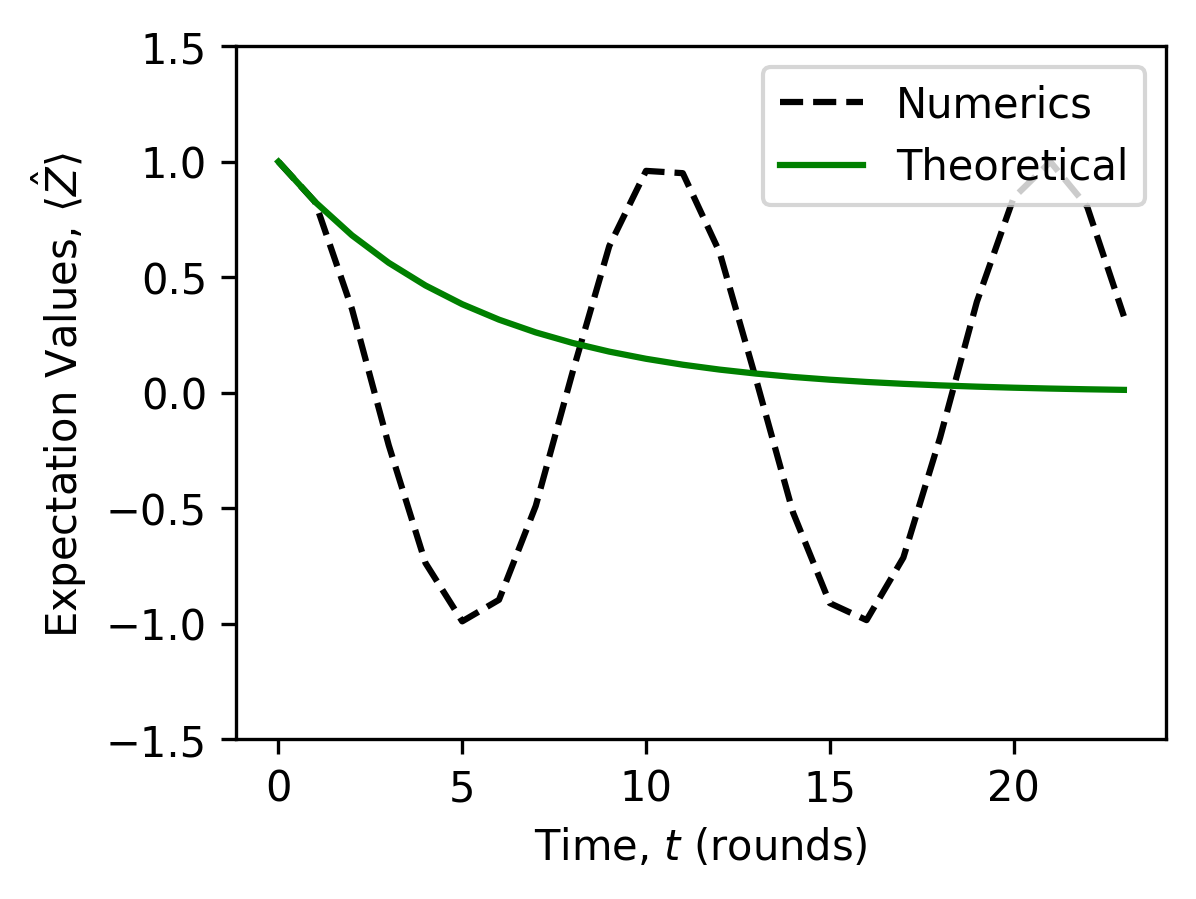

In [16]:
def pauli_twirl_plot(initial, error, probs, t, proj_basis):
      
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300)
    ax.set_ylim(-1.5, 1.5) 
    
    x_axis = np.arange(t)
    theory_y_axis = []
    #mean = []
    #sample_std_list = []
    px = np.abs(0.5 * (sigmax() * error).tr())**2
    py = np.abs(0.5 * (sigmay() * error).tr())**2
    pz = np.abs(0.5 * (sigmaz() * error).tr())**2
    
    counter = 1000
   
    match proj_basis: #Based on Projector Basis of Measurement.. 
        case "X": #case x (eigenstates + and -)
            chosen_obv = sigmax() 
            
            exponetial = (1 - (2 * pz) - (2* py))**x_axis
            #<X> = (1 - 2Pz - 2Py)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTWIRLalt(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)

        case "Y":  #case y (eigenstates +i and -i)
            chosen_obv = sigmay() 
            
            exponetial = (1 - (2 * px) - (2* pz))**x_axis
            #<Y> = (1 - 2Px - 2Pz)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTWIRLalt(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)   

        case "Z":  #case z (eigenstates 0 and 1 )
            chosen_obv = sigmaz() 
            
            exponetial = (1 - (2 * px) - (2* py))**x_axis
            #<Z> = (1 - 2Px - 2Py)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTWIRLalt(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)
                
    #uncertainty = np.array(sample_std_list)  / np.sqrt(rep)
    
    #print(f"Theoretical Expectation Values = {theory_y_axis}")

    #print(f"Measured Mean = {measured_mean}")
    #print(f"Measured Means = {mean}")
         
                #print(f"the array{expectation_array}")
                #print(f"Expectaion Average Sum / Counter: {expectation_average_sum / counter}")
                #print(f"Expectaion Value Sum : {expectation_average_sum}")
                #print(f"Y value : {expect(theoretical_density, chosen_gate) / expectation_average_sum }") 
    #print(f"Measured Error = {std_error}")
    #print(f"Total Measured Error = {error}")
    ax.plot(x_axis, theory_y_axis, '--k', label='Numerics')
    ax.plot(x_axis, exponetial, color='green', label='Theoretical',)
    
    #print(f"Measured Error = {measured_error}")
    #print(f"Measured Error Array = {error}")
    ax.set_xlabel('Time, $t$ (rounds)') # Description, variable in math form, units
    ax.set_ylabel(f'Expectation Values, $\\langle \\hat {{{proj_basis}}}\\rangle$ ') #(mV)
    
    '''
    ax.errorbar(x_axis, mean, # supply the x and y coordinates
                color='#AA4433',
                yerr= uncertainty, # supply the size of the error bars
                fmt='o', # only draw datapoints using circles, don't connect
                markersize=2.5, # size of the circles
                capsize=2, # size of the caps on the error bars
                label='Measured',
                )
    '''
    ax.legend(loc = "upper right") # create the legend with previously marked information

pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0,
               'Py' : 0,
               'Pi' : 1,
               'Pz' : 0}, 
               t=24, proj_basis="Z")
'''
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="X")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Y")

pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.8) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.08) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.7,
               'Py' : 0.1,
               'Pi' : 0.1,
               'Pz' : 0.1}, 
               t=24, proj_basis="Z")
 '''
               #i/x/y/z gates are used ot twirl the error at uniform distribution 
#the consequence of twirling is that the coherent error behaves like a pauli error is a rotation of a qubit 
#<Z> = (1 - 2Px - 2Py)^t

In [7]:
#teleportation sim 
#iX or iZ 
#result of teleportation 
#simualte twirling using teleportation (non ideal teleportation chain)
    #this teleportation chain will apply i/x with probs ~~~
    #this teleportation chain will apply i/z with probs ~~~
#even steps does one, odd does other 
    #density * error 
    #rho -> teleport1 -> error -> teleport2 -> error -> teleport3 
def seed(x): 
    array = [] 
    for i in range(x): 
        array += rand.choices(population=['-', 'other-'], weights=[0.5, 0.5], k=1)#odd case 
        array += rand.choices(population=['+', 'other+'], weights=[0.5, 0.5], k=1)#even case
    print(array)
seed(10)



['other-', '+', '-', 'other+', '-', '+', 'other-', 'other+', 'other-', 'other+', 'other-', '+', '-', 'other+', '-', '+', 'other-', 'other+', 'other-', '+']


In [4]:
def pauliTeleportTwirl(rhoI, error, probs,n):
    gates = [] 
    lhsEC = qeye(2) 
    pi_even = 1 - probs['Px'] 
    pi_odd = 1 - probs['Pz']
    combo_gate = qeye(2)
    
    for i in range(n):
        if i % 2 == 0:
            gates += rand.choices(population=[sigmax(), qeye(2)], weights=[probs['Px'], pi_even], k=1) #even case first
        else:
            gates += rand.choices(population=[sigmaz(), qeye(2)], weights=[probs['Pz'], pi_odd ], k=1) #odd case second
    #print(gates)
    for g in gates: 
        combo_gate = combo_gate * g
        lhsEC = error * g * lhsEC 
    #print(lhsEC)   
    return combo_gate * lhsEC * rhoI * lhsEC.dag() * combo_gate.dag()

pauliTeleportTwirl(basis(2,0)*basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 1,'Pz' : 1}, n=1)




Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.91266781+0.j         0.        +0.28232124j]
 [0.        -0.28232124j 0.08733219+0.j        ]]

KeyboardInterrupt: 

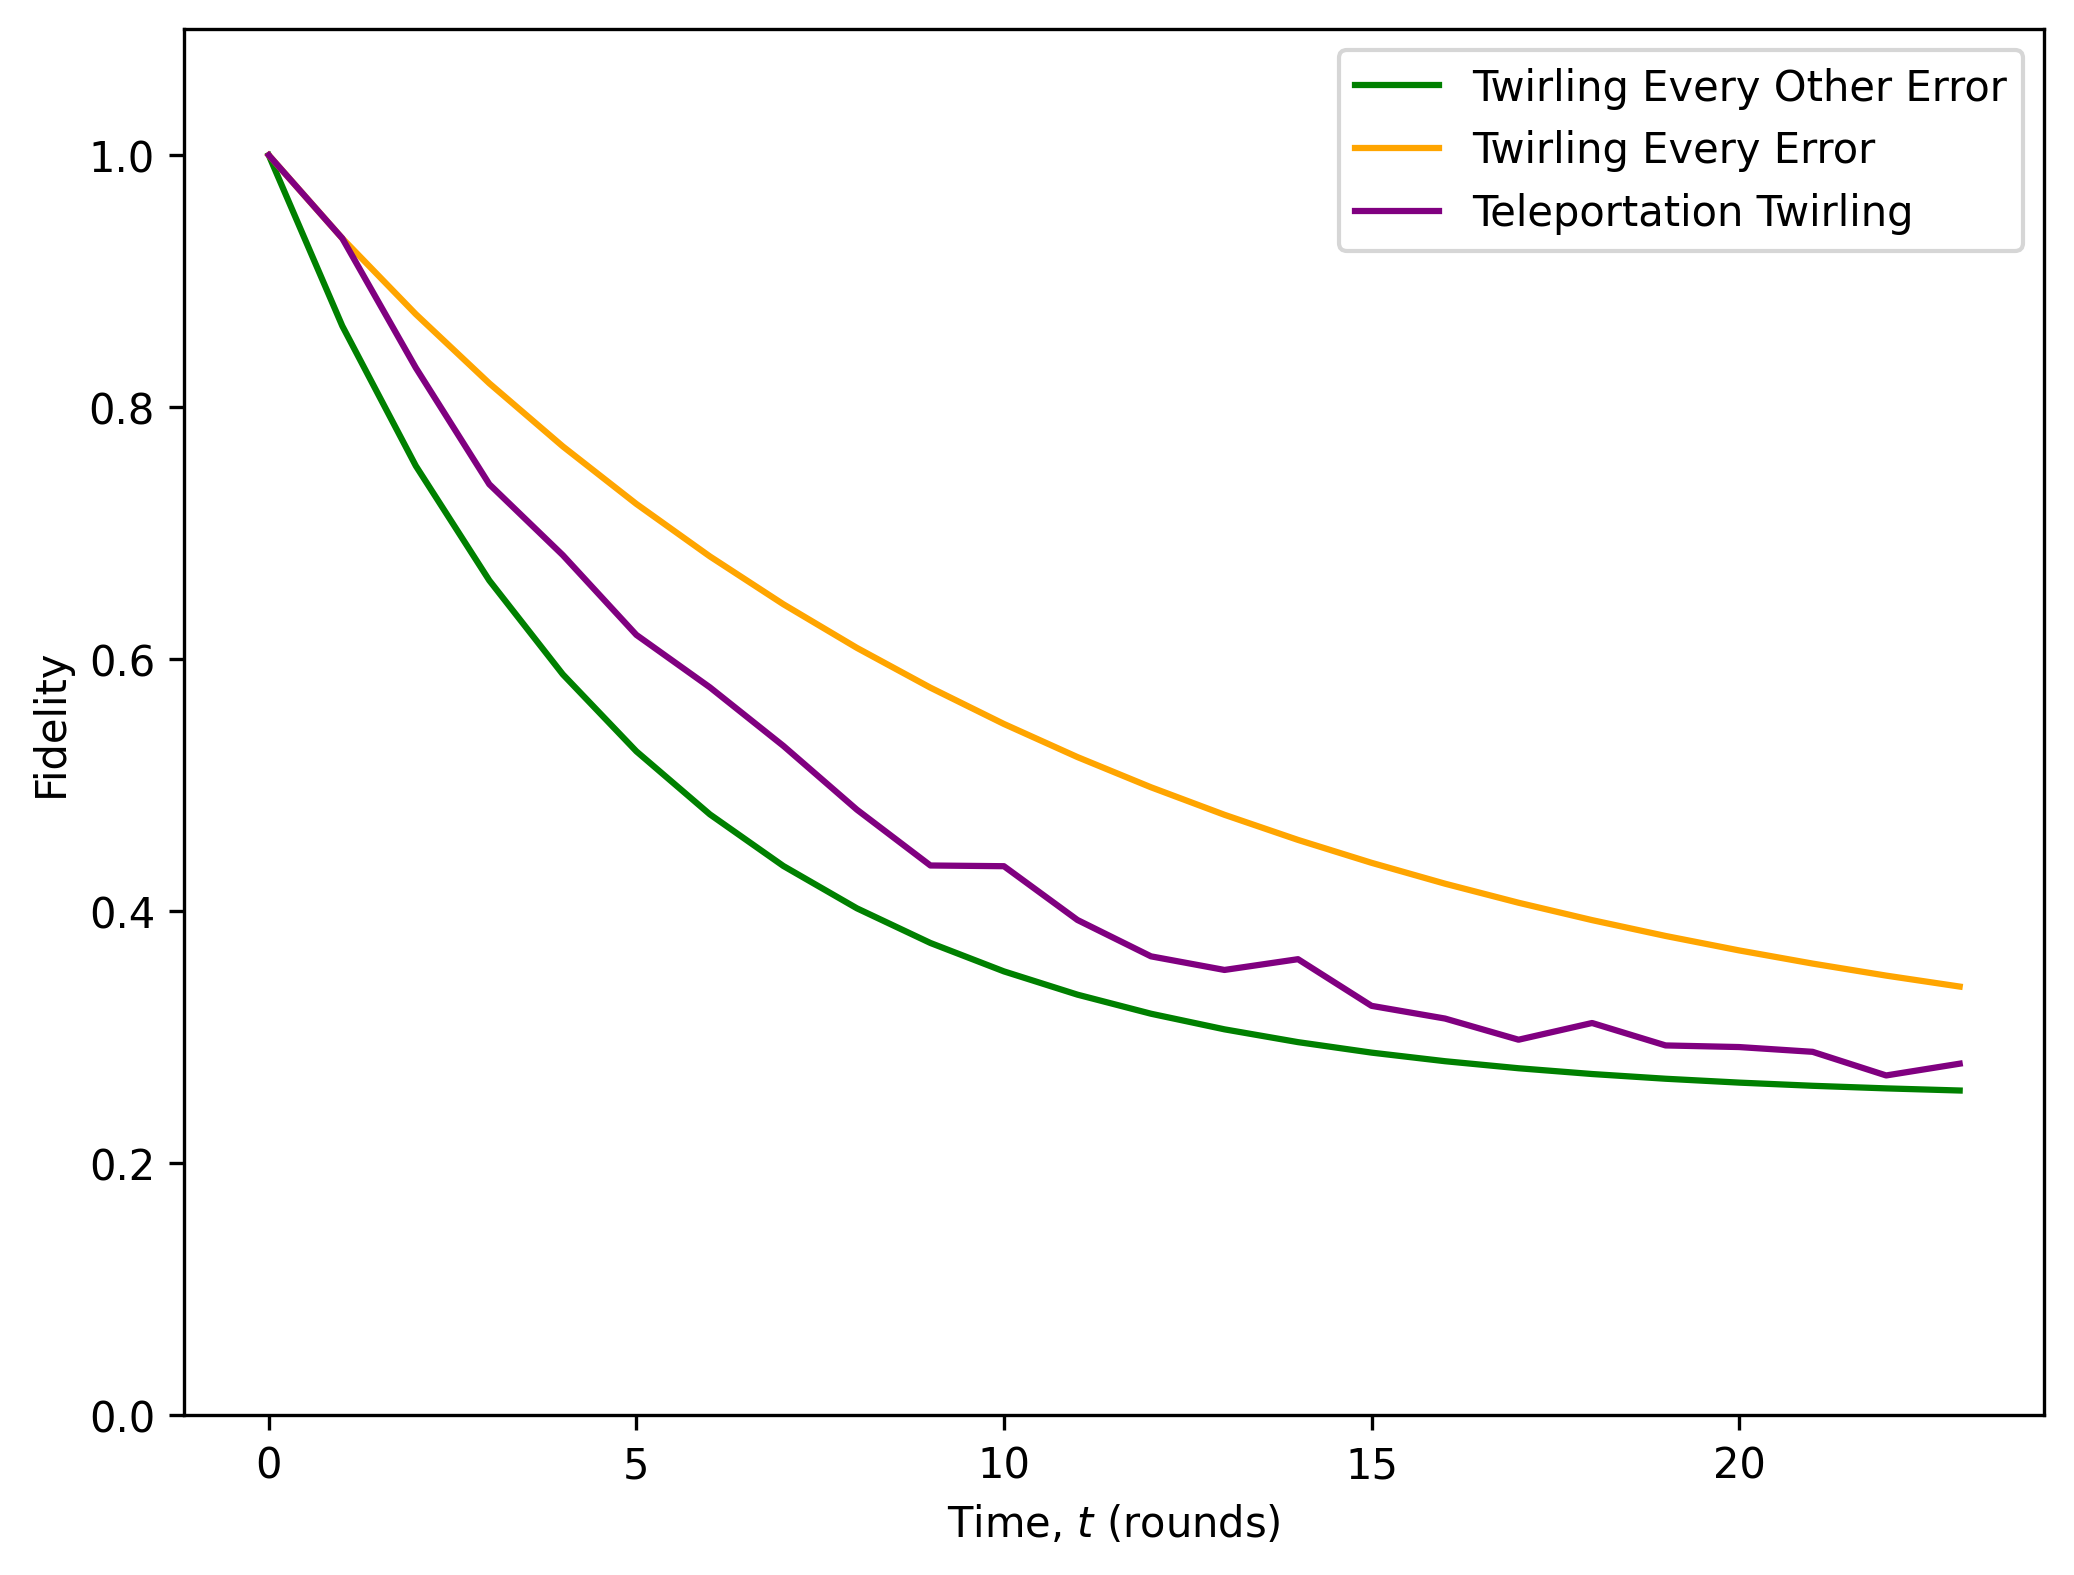

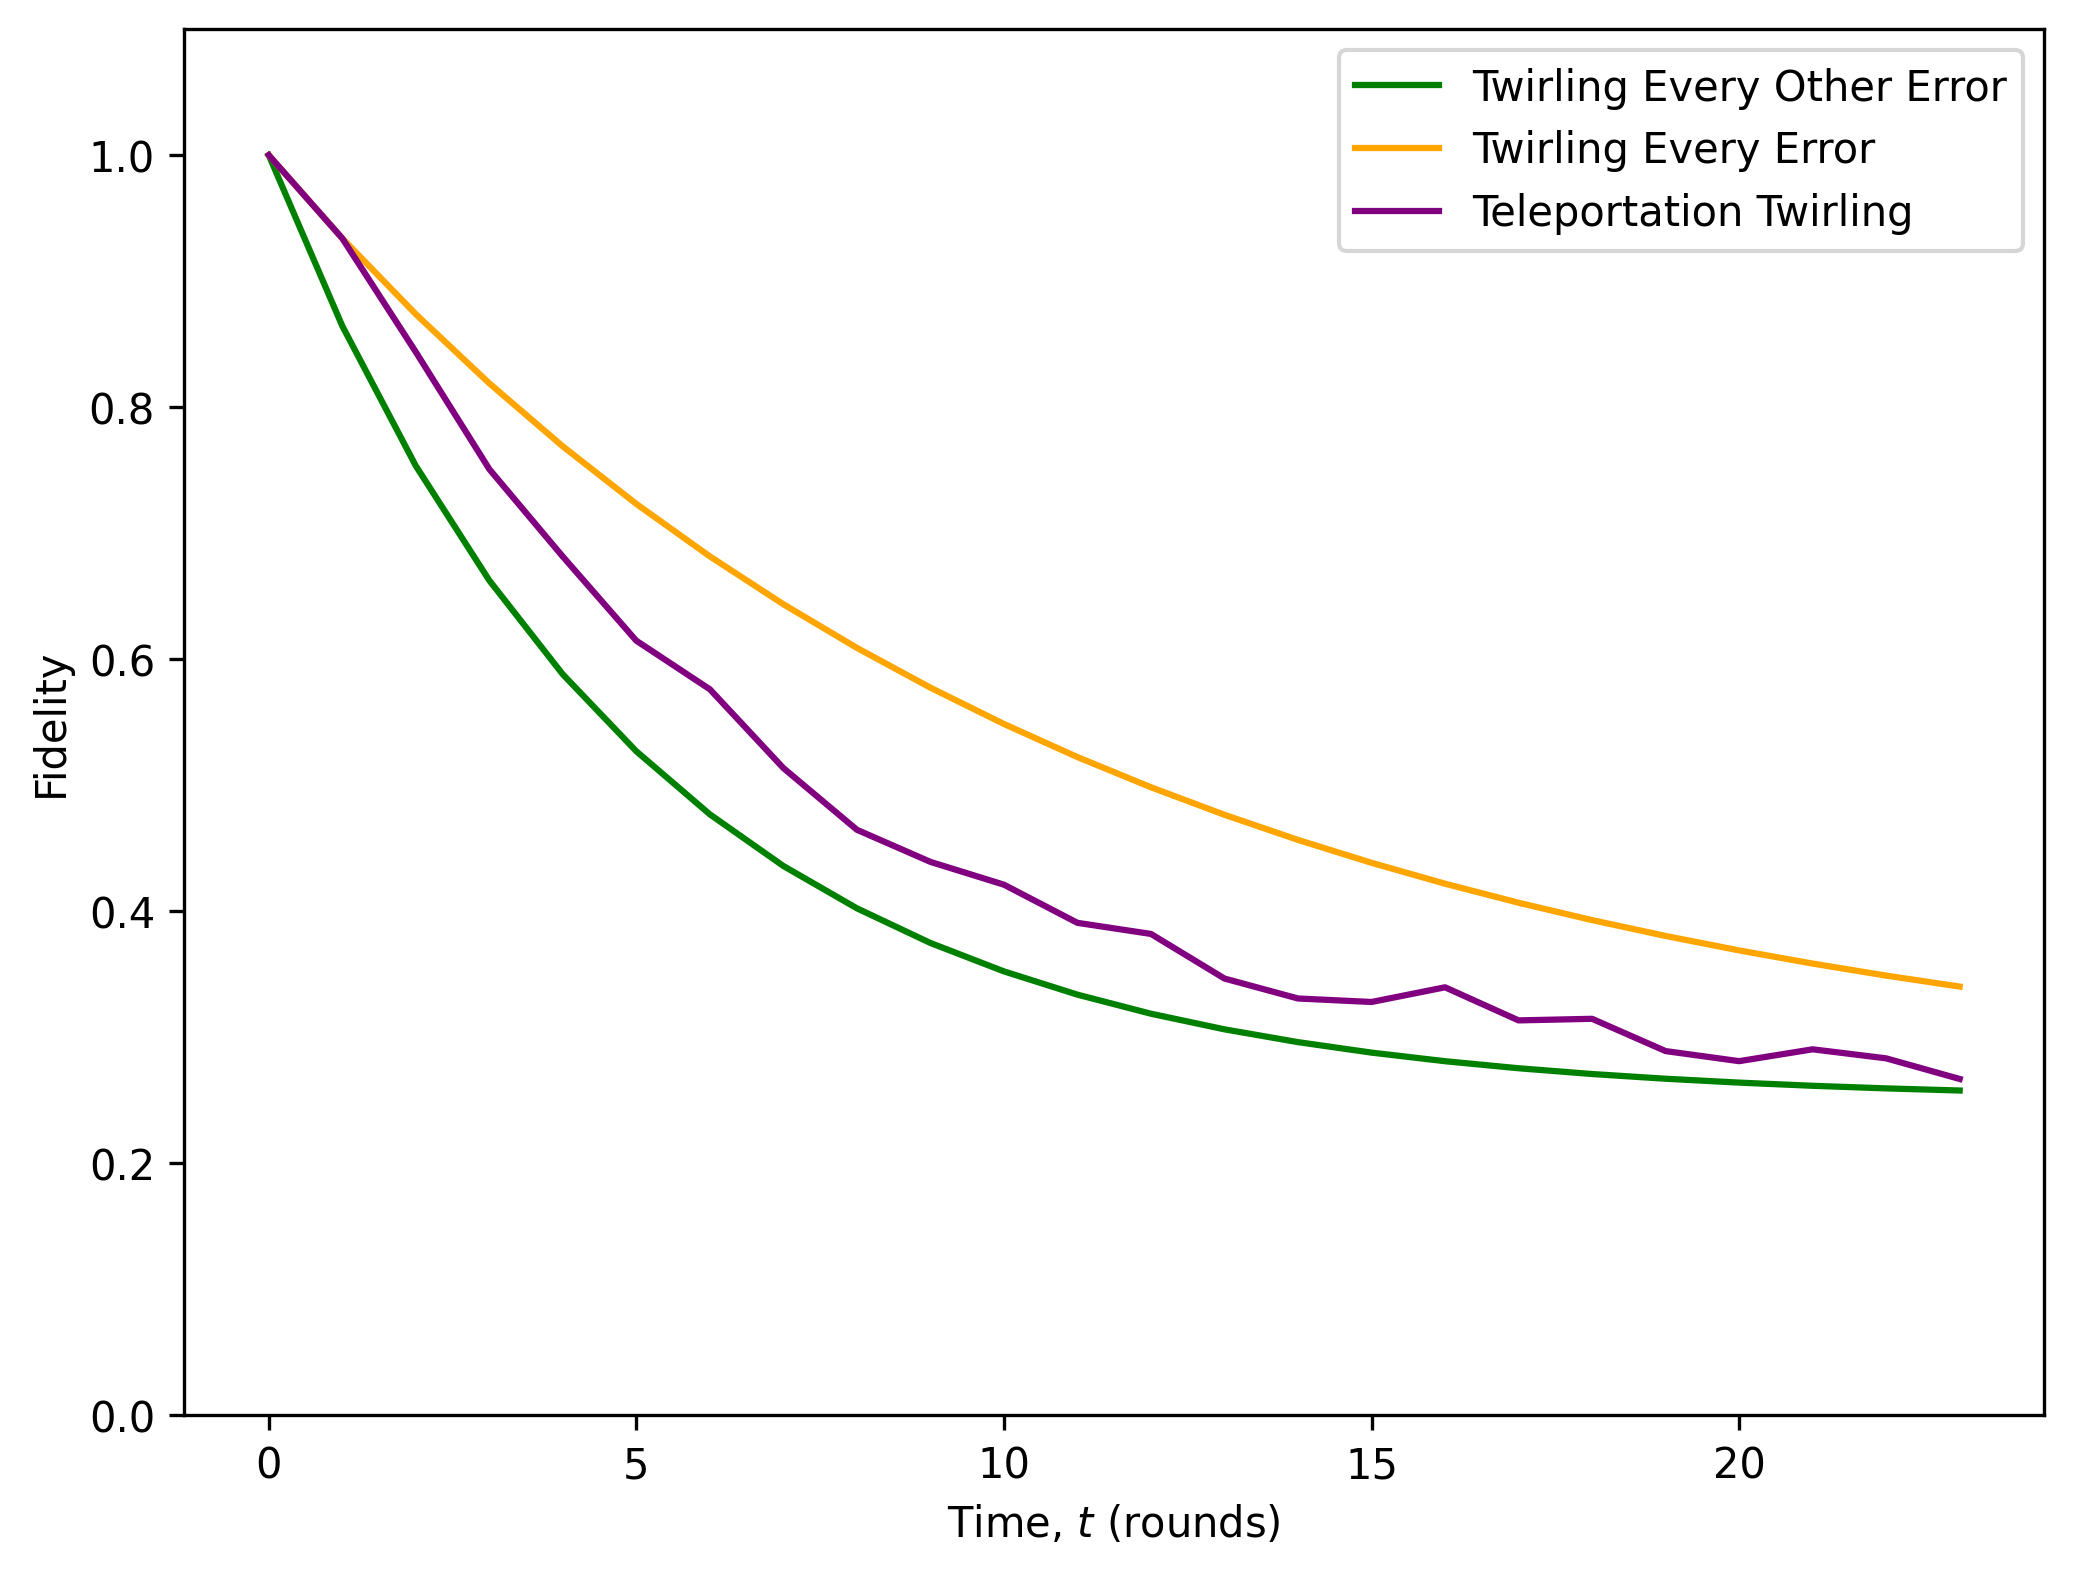

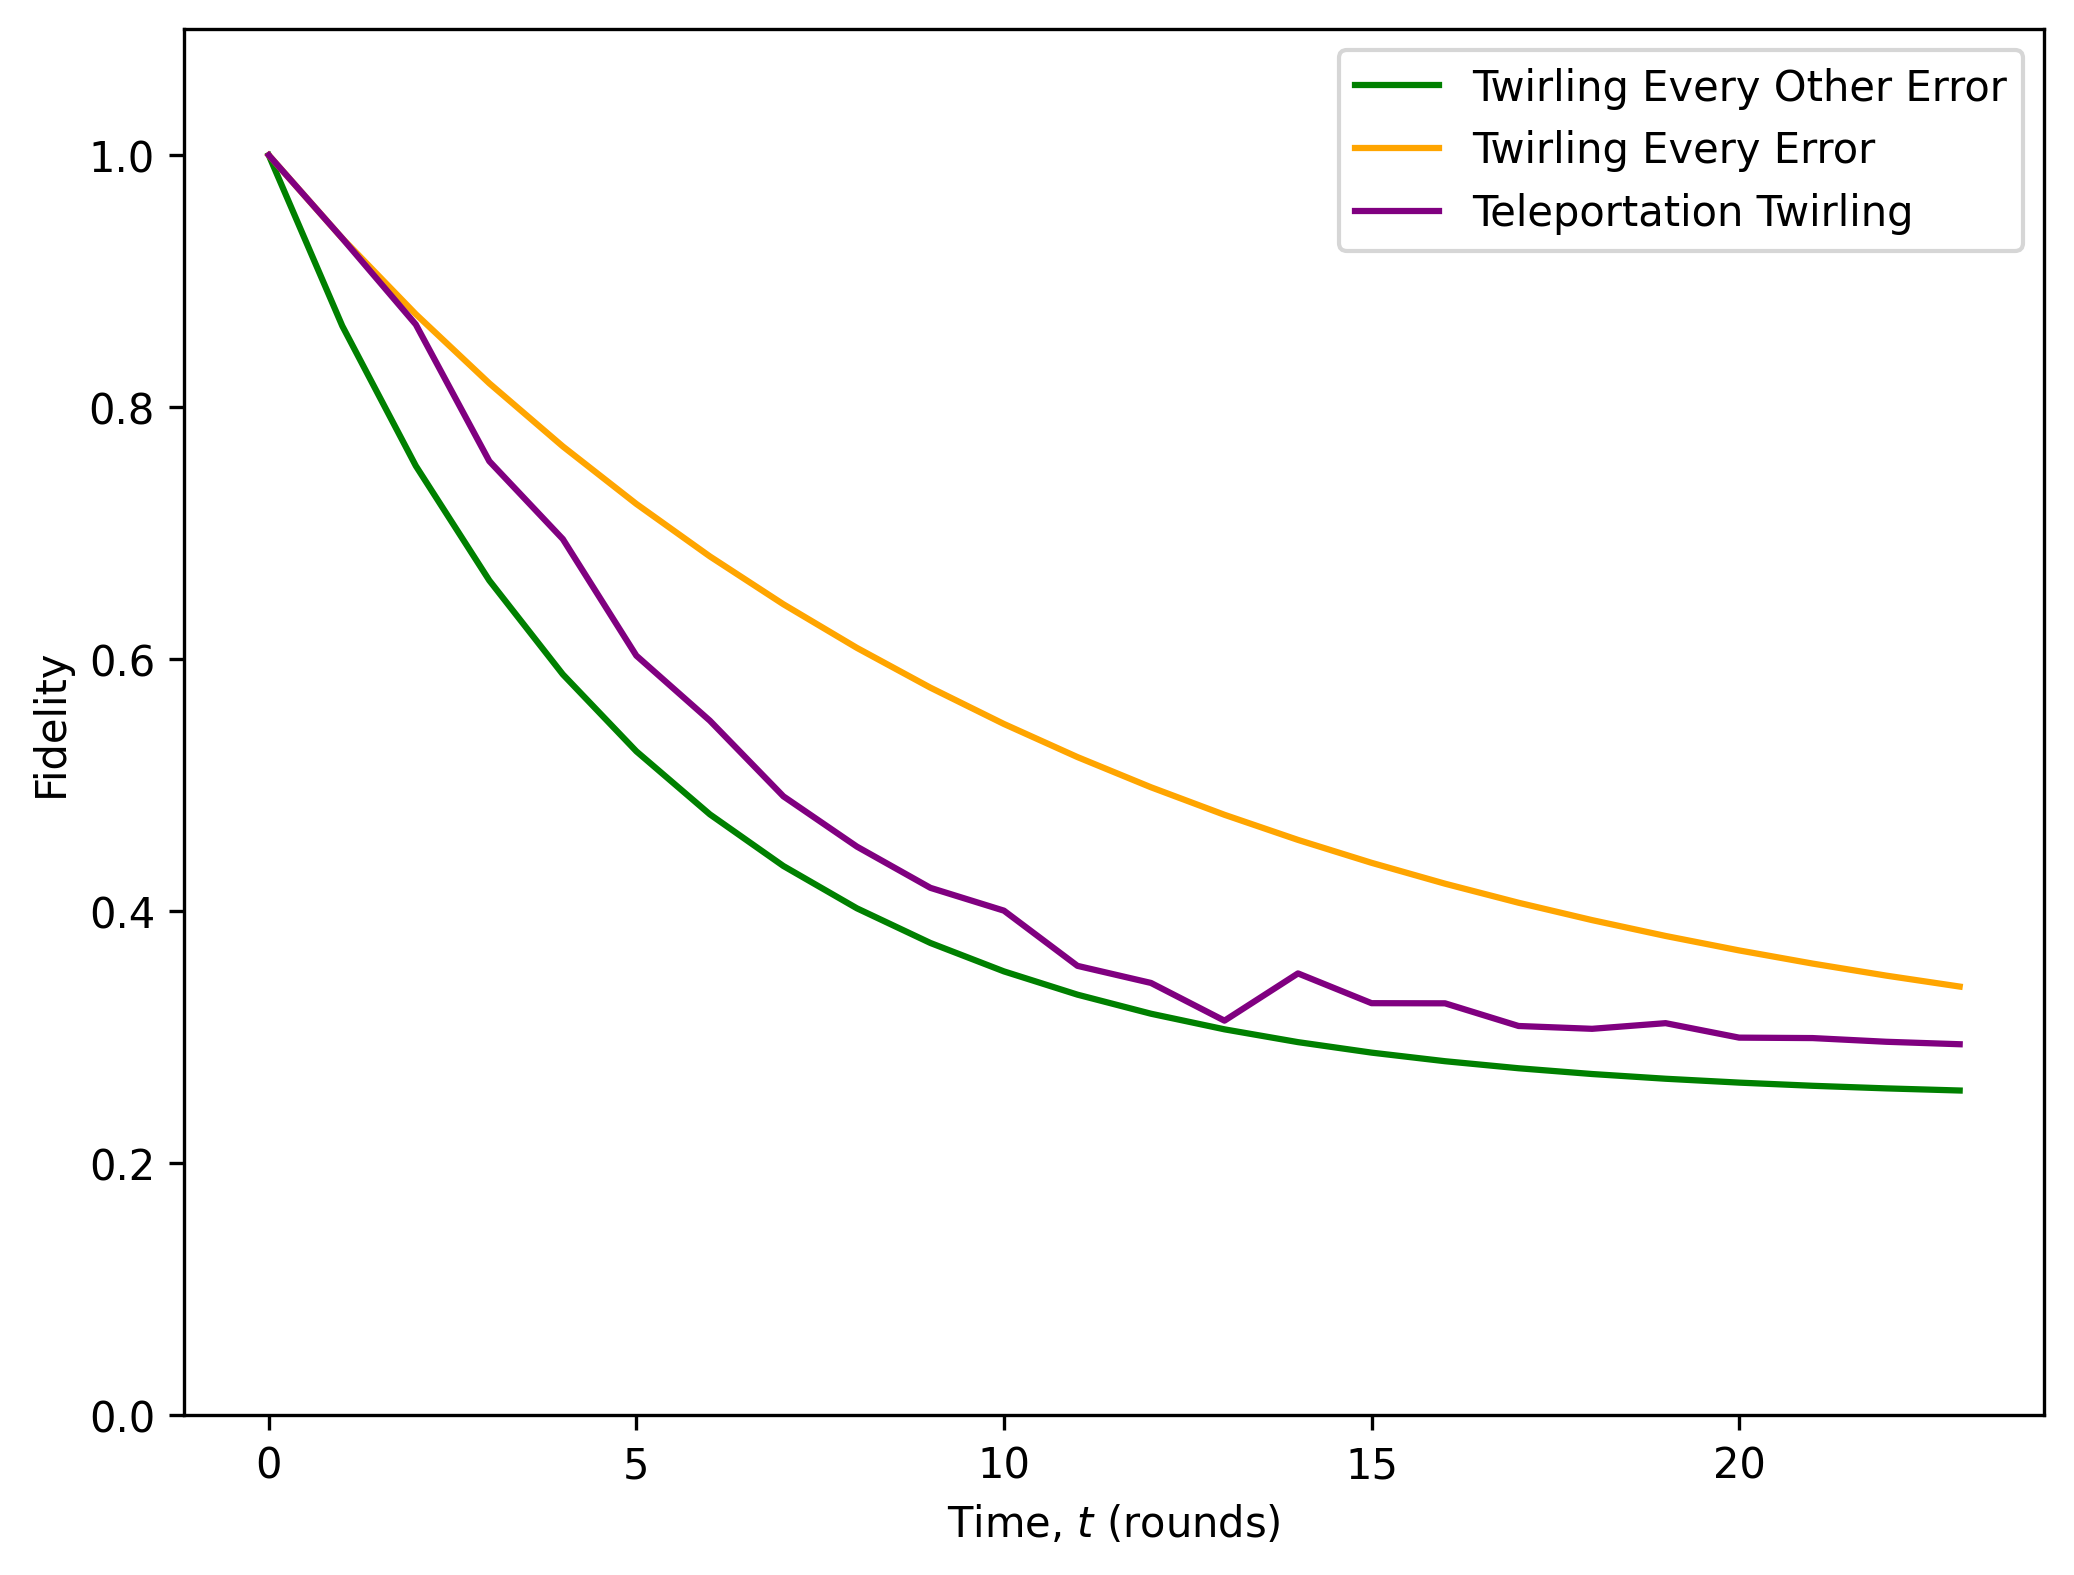

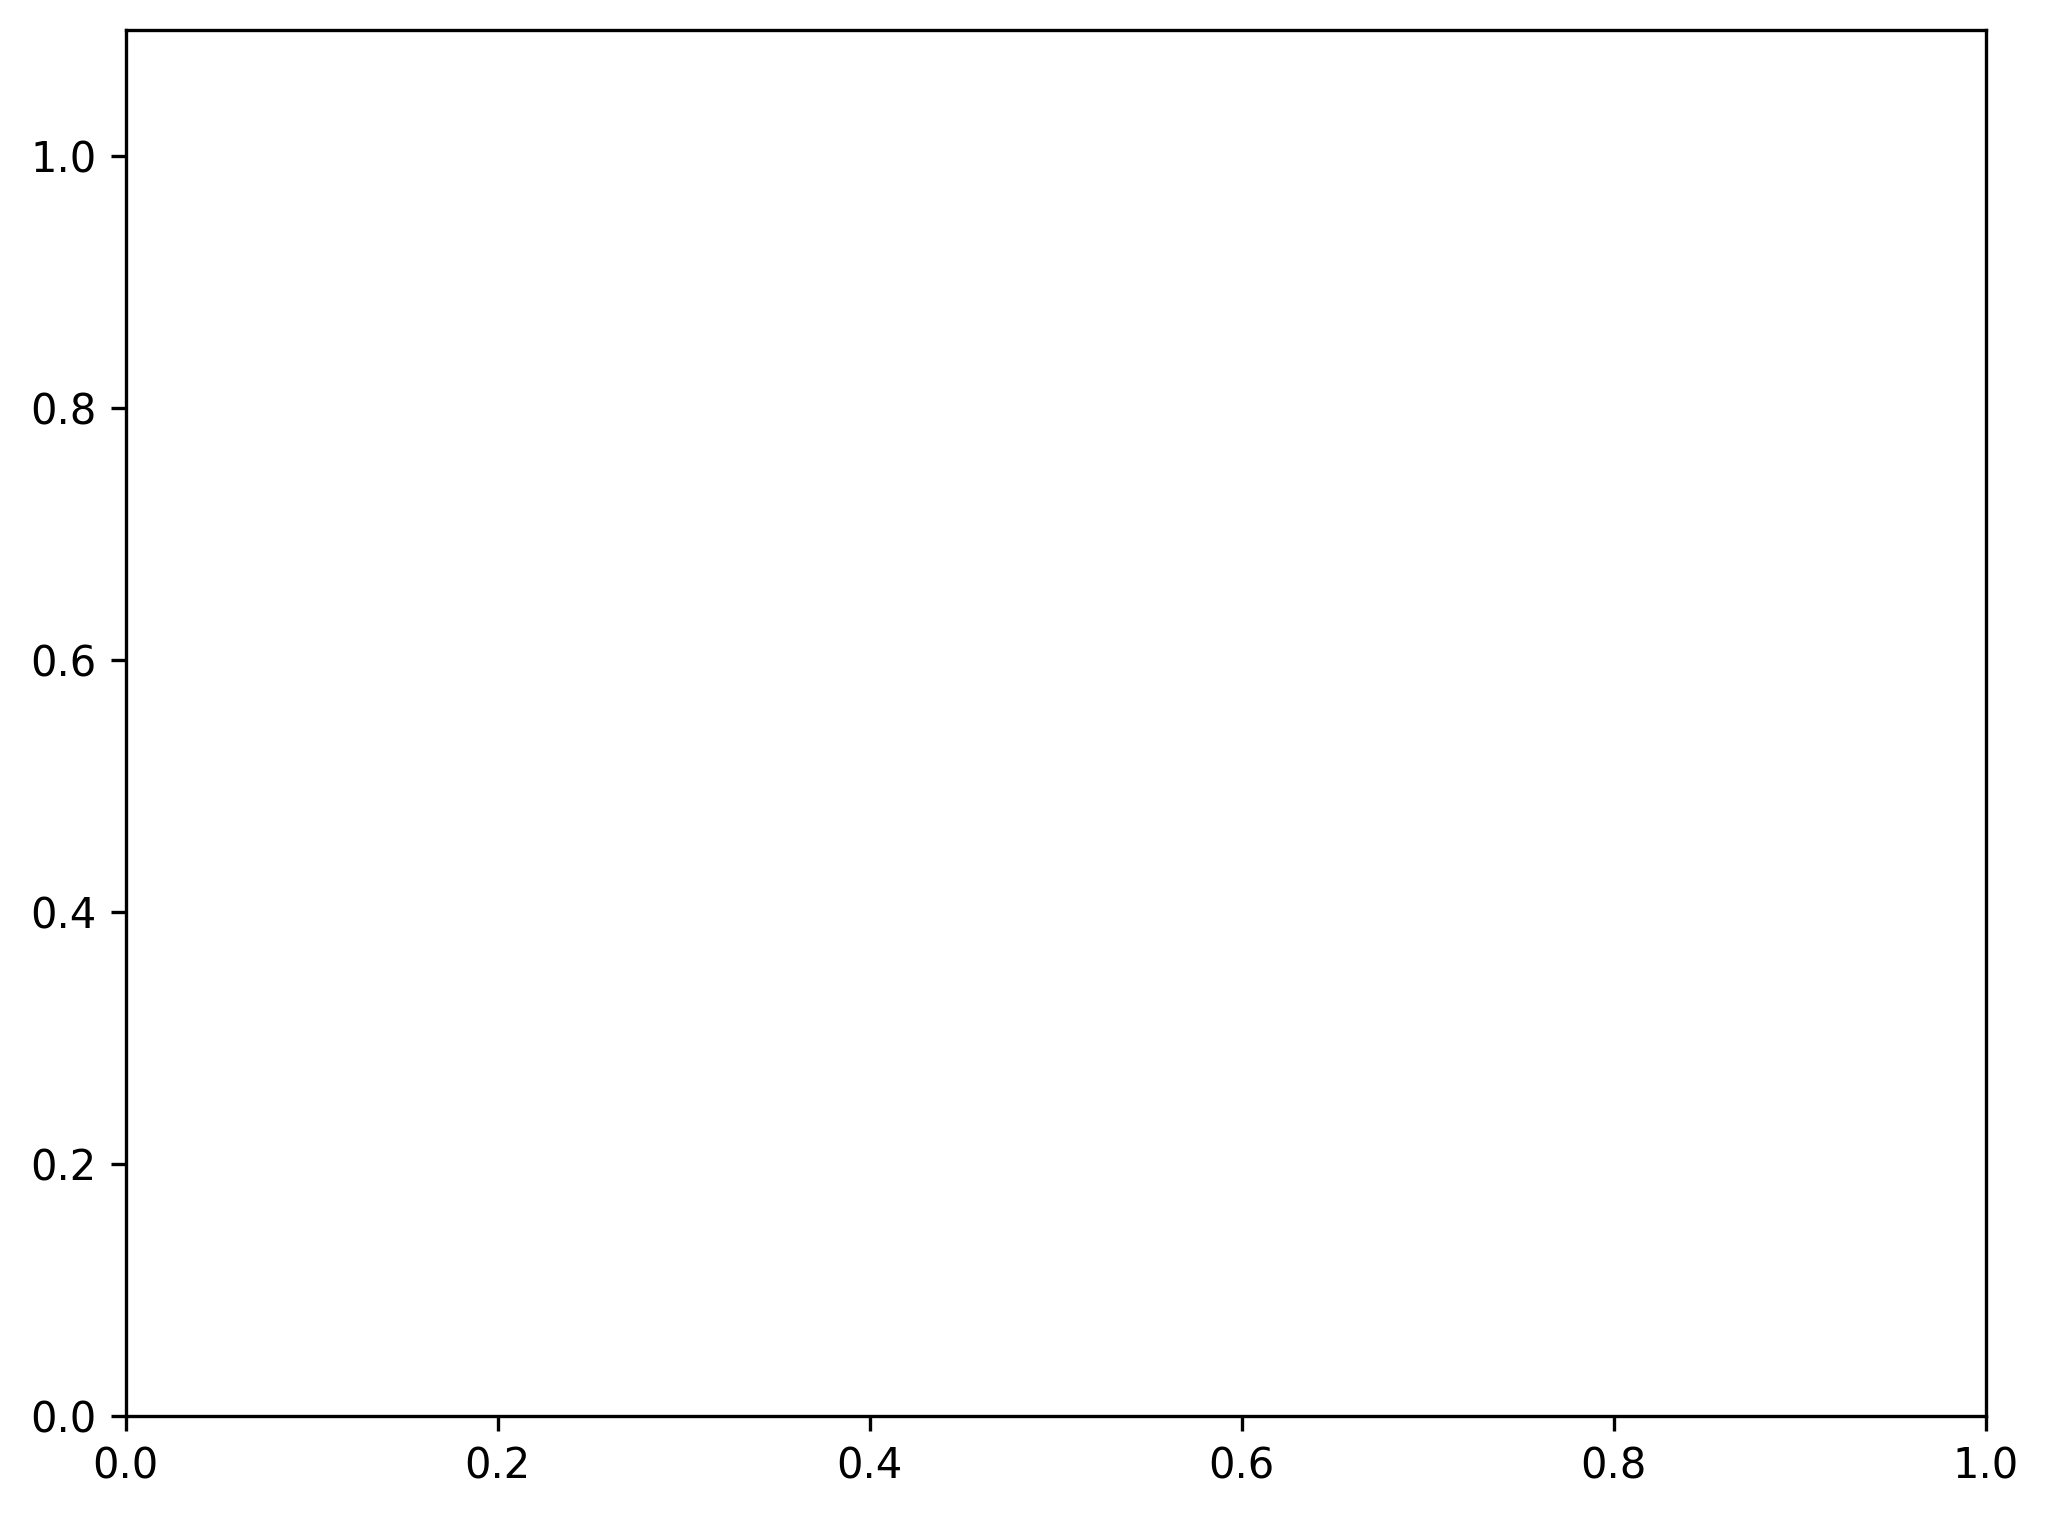

In [7]:
def pauli_tele_twirl_plot(initial, error, probs, t, proj_basis, counter =1000):
      
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    ax.set_ylim(0, 1.1) 
    
    x_axis = np.arange(t)
    theory_y_axis = []

    px = np.abs(0.5 * (sigmax() * error**2).tr())**2
    py = np.abs(0.5 * (sigmay() * error**2).tr())**2
    pz = np.abs(0.5 * (sigmaz() * error**2).tr())**2 

    pxO = np.abs(0.5 * (sigmax() * error).tr())**2
    pyO = np.abs(0.5 * (sigmay() * error).tr())**2
    pzO = np.abs(0.5 * (sigmaz() * error).tr())**2 

    exponetial = (1 - (2 * px) - (2* py))**(x_axis/2) + (1 - (2 * px) - (2* pz))**(x_axis/2) + (1 - (2 * pz) - (2* py))**(x_axis/2) + 1  #Pair Twirled
    
    exponetial2t = (1 - (2 * pxO) - (2* pyO))**(x_axis) + (1 - (2 * pxO) - (2* pzO))**(x_axis) + (1 - (2 * pzO) - (2* pyO))**(x_axis) + 1 #Perfect Twirled
    
    pair_twirl_line = exponetial / 4 
    perfect_twirl_line = exponetial2t / 4
    
    
    fidelity_axis = []   
    for time in x_axis:  
                fidelity_array = []                                                              
                for i in range(counter): 
                    #twirled = pauliTeleportTwirl(initial, error, probs, time)
                    fidelity_array.append(fidelity(error, probs, time))
                
                fidelity_average_sum = sum(fidelity_array) 
                fidelity_axis.append(fidelity_average_sum / counter)
    
    match proj_basis: #Based on Projector Basis of Measurement.. 
        case "X": #case x (eigenstates + and -)
            chosen_obv = sigmax() 
            
            exponetial = (1 - (2 * px) - (2* py))**x_axis #Pair Twirled
            exponetial2t = (1 - (2 * pxO) - (2* pyO))**(2 * x_axis) #Perfect Twirled
            #<X> = (1 - 2Pz - 2Py)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTeleportTwirl(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)

        case "Y":  #case y (eigenstates +i and -i)
            chosen_obv = sigmay() 
            
            exponetial = (1 - (2 * px) - (2* py))**x_axis #Pair Twirled
            exponetial2t = (1 - (2 * pxO) - (2* pyO))**(2 * x_axis) #Perfect Twirled
            #<Y> = (1 - 2Px - 2Pz)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTeleportTwirl(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)   

        case "Z":  #case z (eigenstates 0 and 1 )
            chosen_obv = sigmaz() 
            
            exponetial = (1 - (2 * px) - (2* py))**x_axis #Pair Twirled
            exponetial2t = (1 - (2 * pxO) - (2* pyO))**(2 * x_axis) #Perfect Twirled
            #<Z> = (1 - 2Px - 2Py)^t                                        
            for time in x_axis:  
                expectation_array = []                                                              
                for i in range(counter): 
                    twirled = pauliTeleportTwirl(initial, error, probs, time) 
                    #print(f"I am Twirled at {time}: {twirled}")
                    expectation_array.append(expect(twirled, chosen_obv))
                
                expectation_average_sum = sum(expectation_array) 
                theory_y_axis.append(expectation_average_sum / counter)
    
    #Plotting/Labeling 
    #ax.plot(x_axis, theory_y_axis, '--k', label='Numerics')
    ax.plot(x_axis, pair_twirl_line, color='green', label='Twirling Every Other Error',)
    ax.plot(x_axis, perfect_twirl_line, color='orange', label='Twirling Every Error',)
    ax.plot(x_axis, fidelity_axis, color='purple', label='Teleportation Twirling') #average/sum of all 3 projectors of measurement (X Y Z)
    
    ax.set_xlabel('Time, $t$ (rounds)') # Description, variable in math form, units
    ax.set_ylabel('Fidelity') #(mV)

    ax.legend(loc = "upper right") # create the legend with previously marked information

#pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.25,
#               'Pz' : 0.25}, 
#               t=24, proj_basis="Z") 
'''
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * sigmax()).expm(), probs={'Px' : 0.0,
               'Pz' : 0.0}, 
               t=24, proj_basis="Z", counter =100)
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * sigmax()).expm(), probs={'Px' : 0.5,
               'Pz' : 0}, 
               t=24, proj_basis="Z", counter =100)


pauli_tele_twirl_plot(Qobj([[0.5, 0.5], [0.5,0.5]]), (-1j * (0.15) * sigmaz()).expm(), probs={'Px' : 0.5,
               'Pz' : 0}, 
               t=24, proj_basis="X", counter =1000)

pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.99,
               'Pz' : 0.99}, 
               t=24, proj_basis="Z", counter = 100)
            
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * (sigmax()+sigmay()+sigmaz())).expm(), probs={'Px' : 1,
               'Pz' : 1}, 
               t=24, proj_basis="Z", counter = 100) 
'''
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()+sigmaz())).expm(), 
                probs={'Px' : 0.5,
                       'Pz' : 0.5}, 
               t=24, proj_basis="Z", counter = 1000)
  
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), 
                probs={'Px' : 0.4,
                       'Pz' : 0.6}, 
               t=24, proj_basis="Z", counter = 1000) 

pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), 
                probs={'Px' : 0.3,
                       'Pz' : 0.7}, 
               t=24, proj_basis="Z", counter = 1000) 

pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), 
                probs={'Px' : 0.2,
                       'Pz' : 0.8}, 
               t=24, proj_basis="Z", counter = 1000) 
'''
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), probs={'Px' : 0,
               'Pz' : 1}, 
               t=24, proj_basis="Z", counter = 1000) 
'''


In [6]:
def fidelity(error, probs,n):
    gates = [] 
    lhsEC = qeye(2) 
    pi_even = 1 - probs['Px'] 
    pi_odd = 1 - probs['Pz']
    combo_gate = qeye(2)
    
    for i in range(n):
        if i % 2 == 0:
            gates += rand.choices(population=[sigmax(), qeye(2)], weights=[probs['Px'], pi_even], k=1) #even case first
        else:
            gates += rand.choices(population=[sigmaz(), qeye(2)], weights=[probs['Pz'], pi_odd ], k=1) #odd case second
    #print(gates)
    for g in gates: 
        combo_gate = combo_gate * g
        lhsEC = error * g * lhsEC 
    
    return np.abs(0.5 *(combo_gate * lhsEC).tr())**2


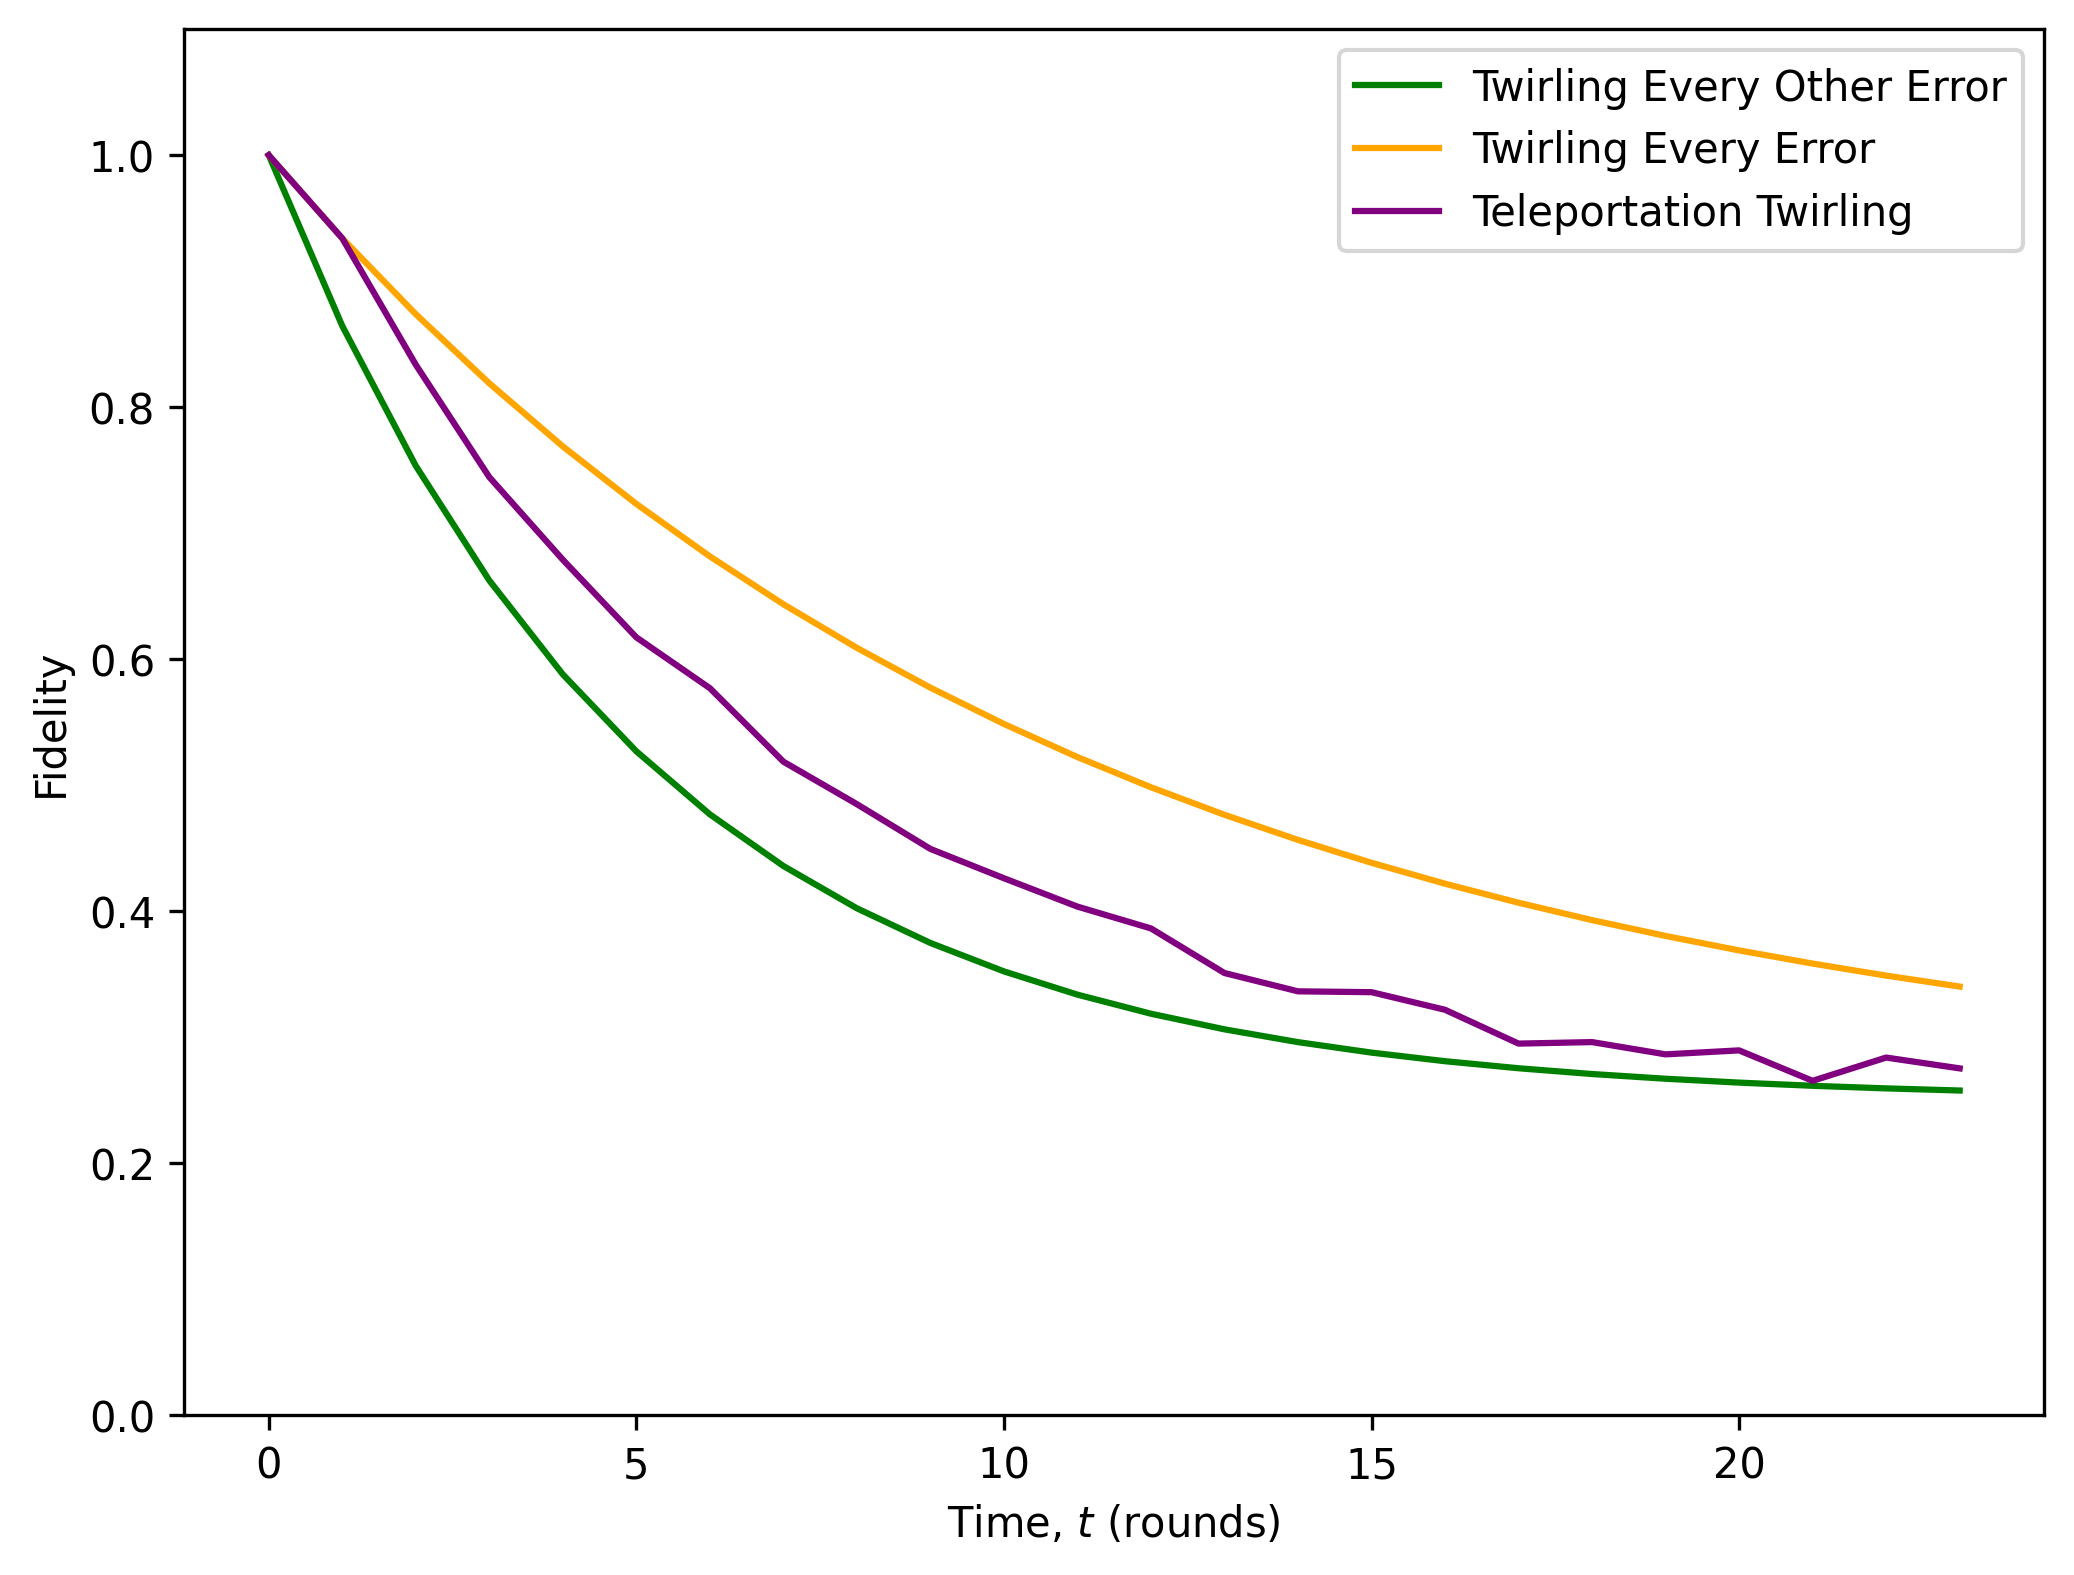

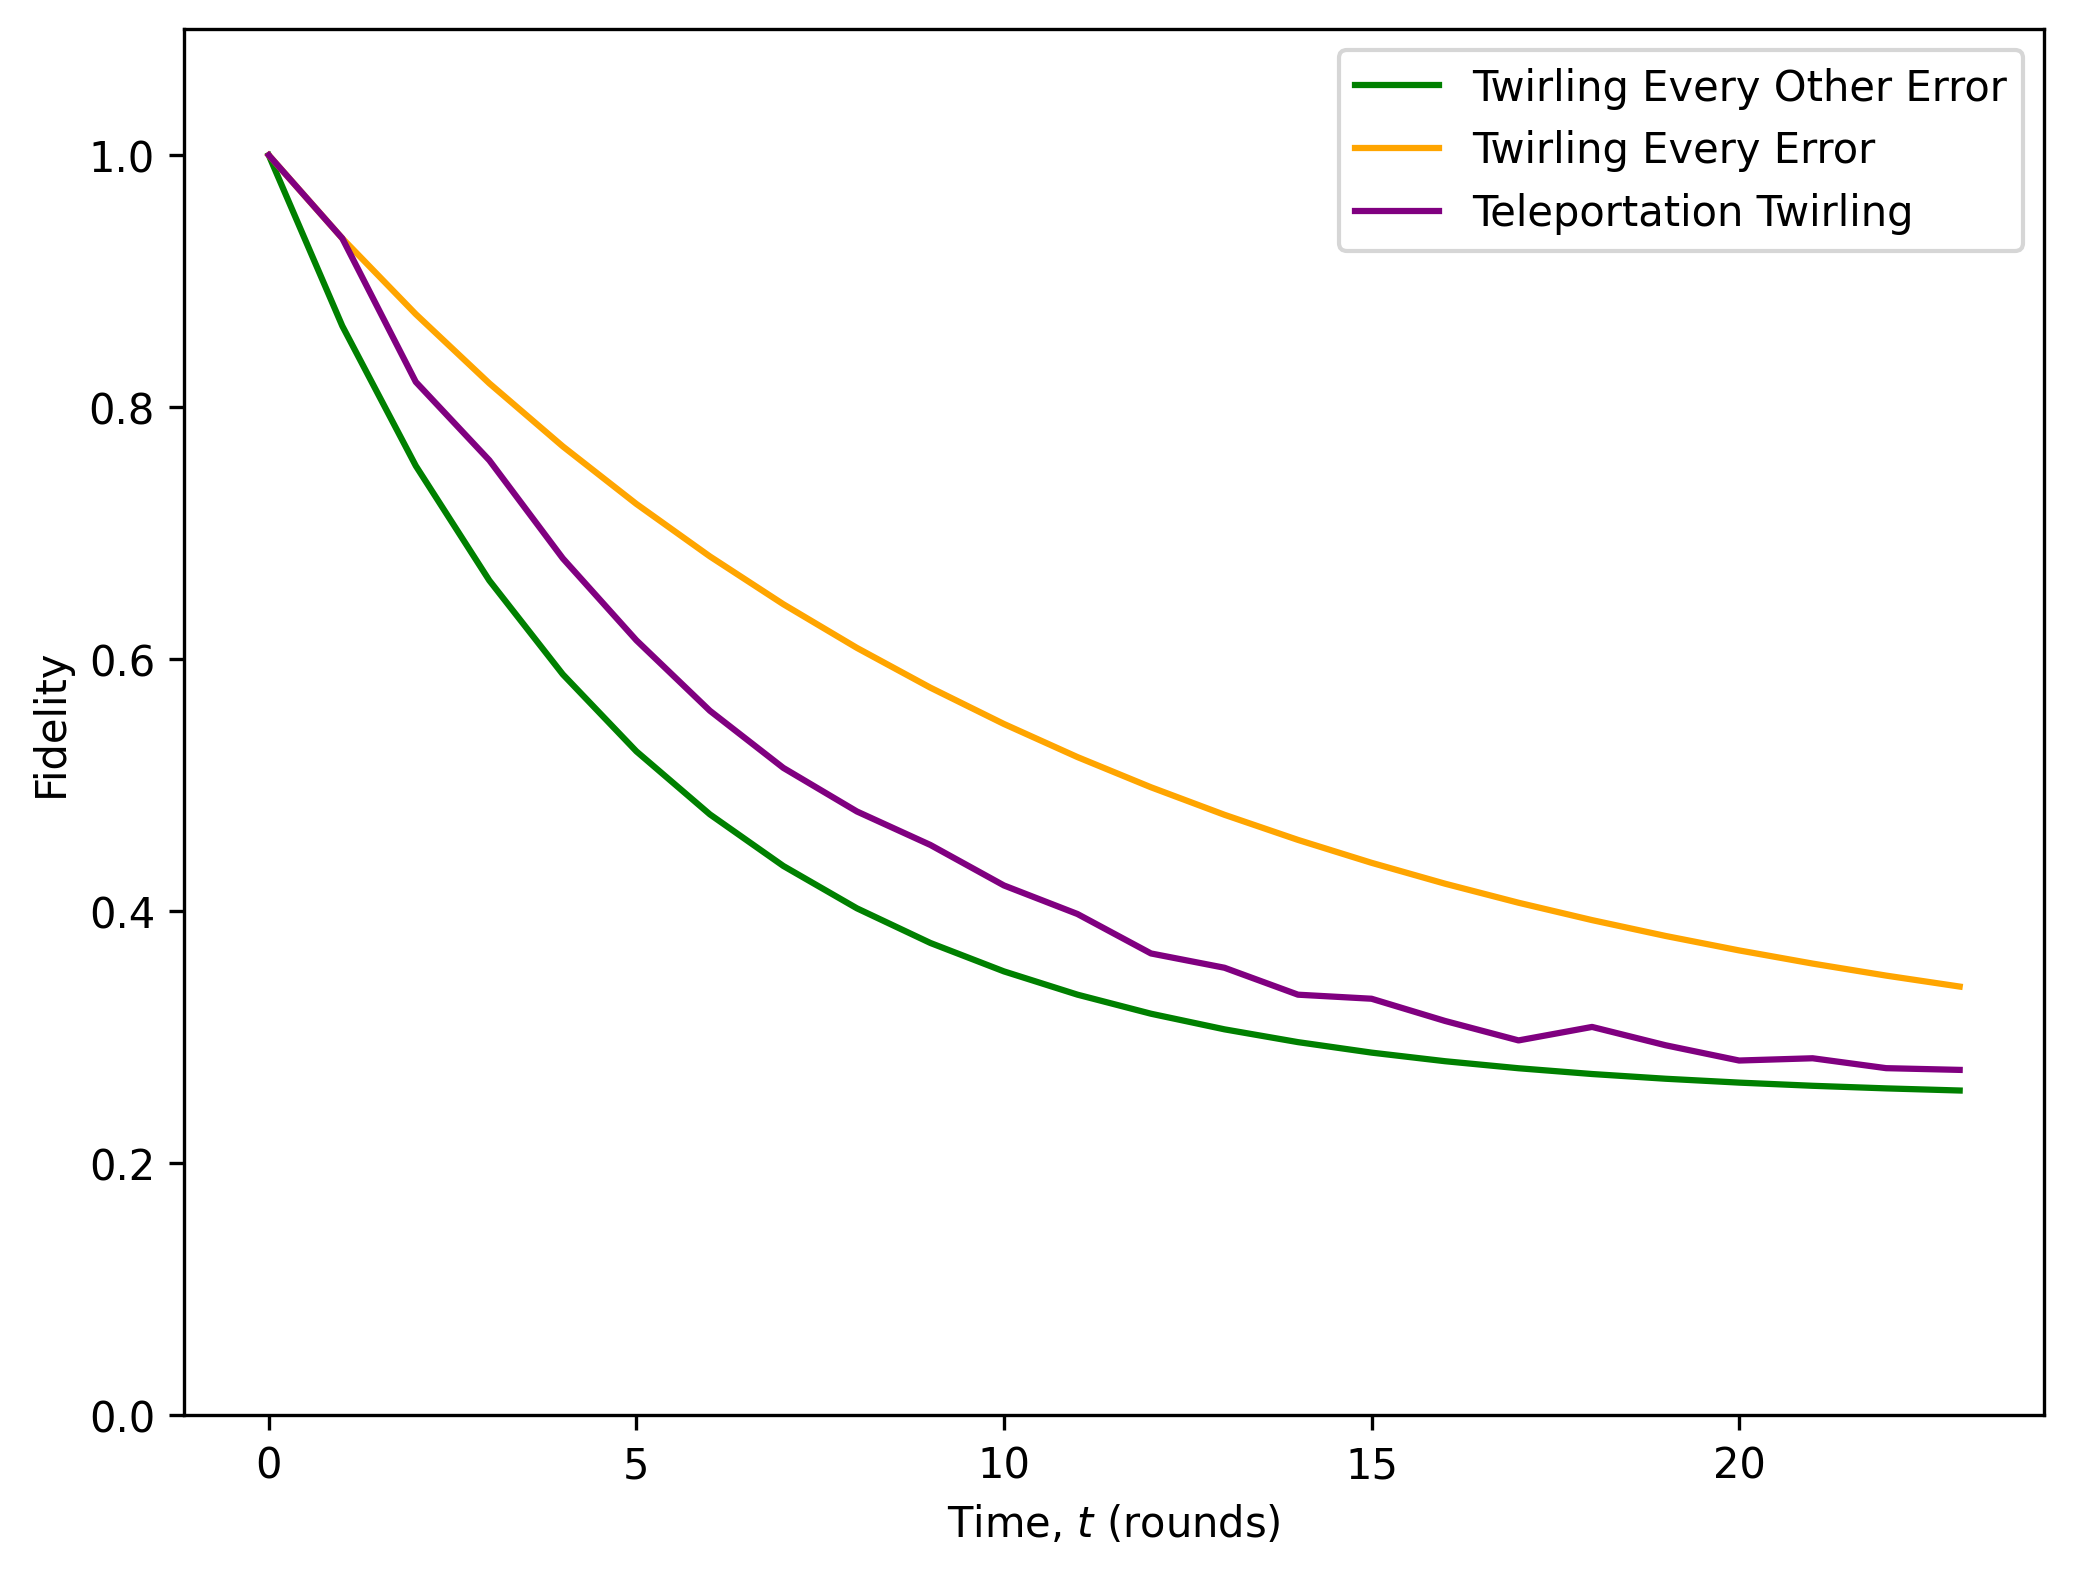

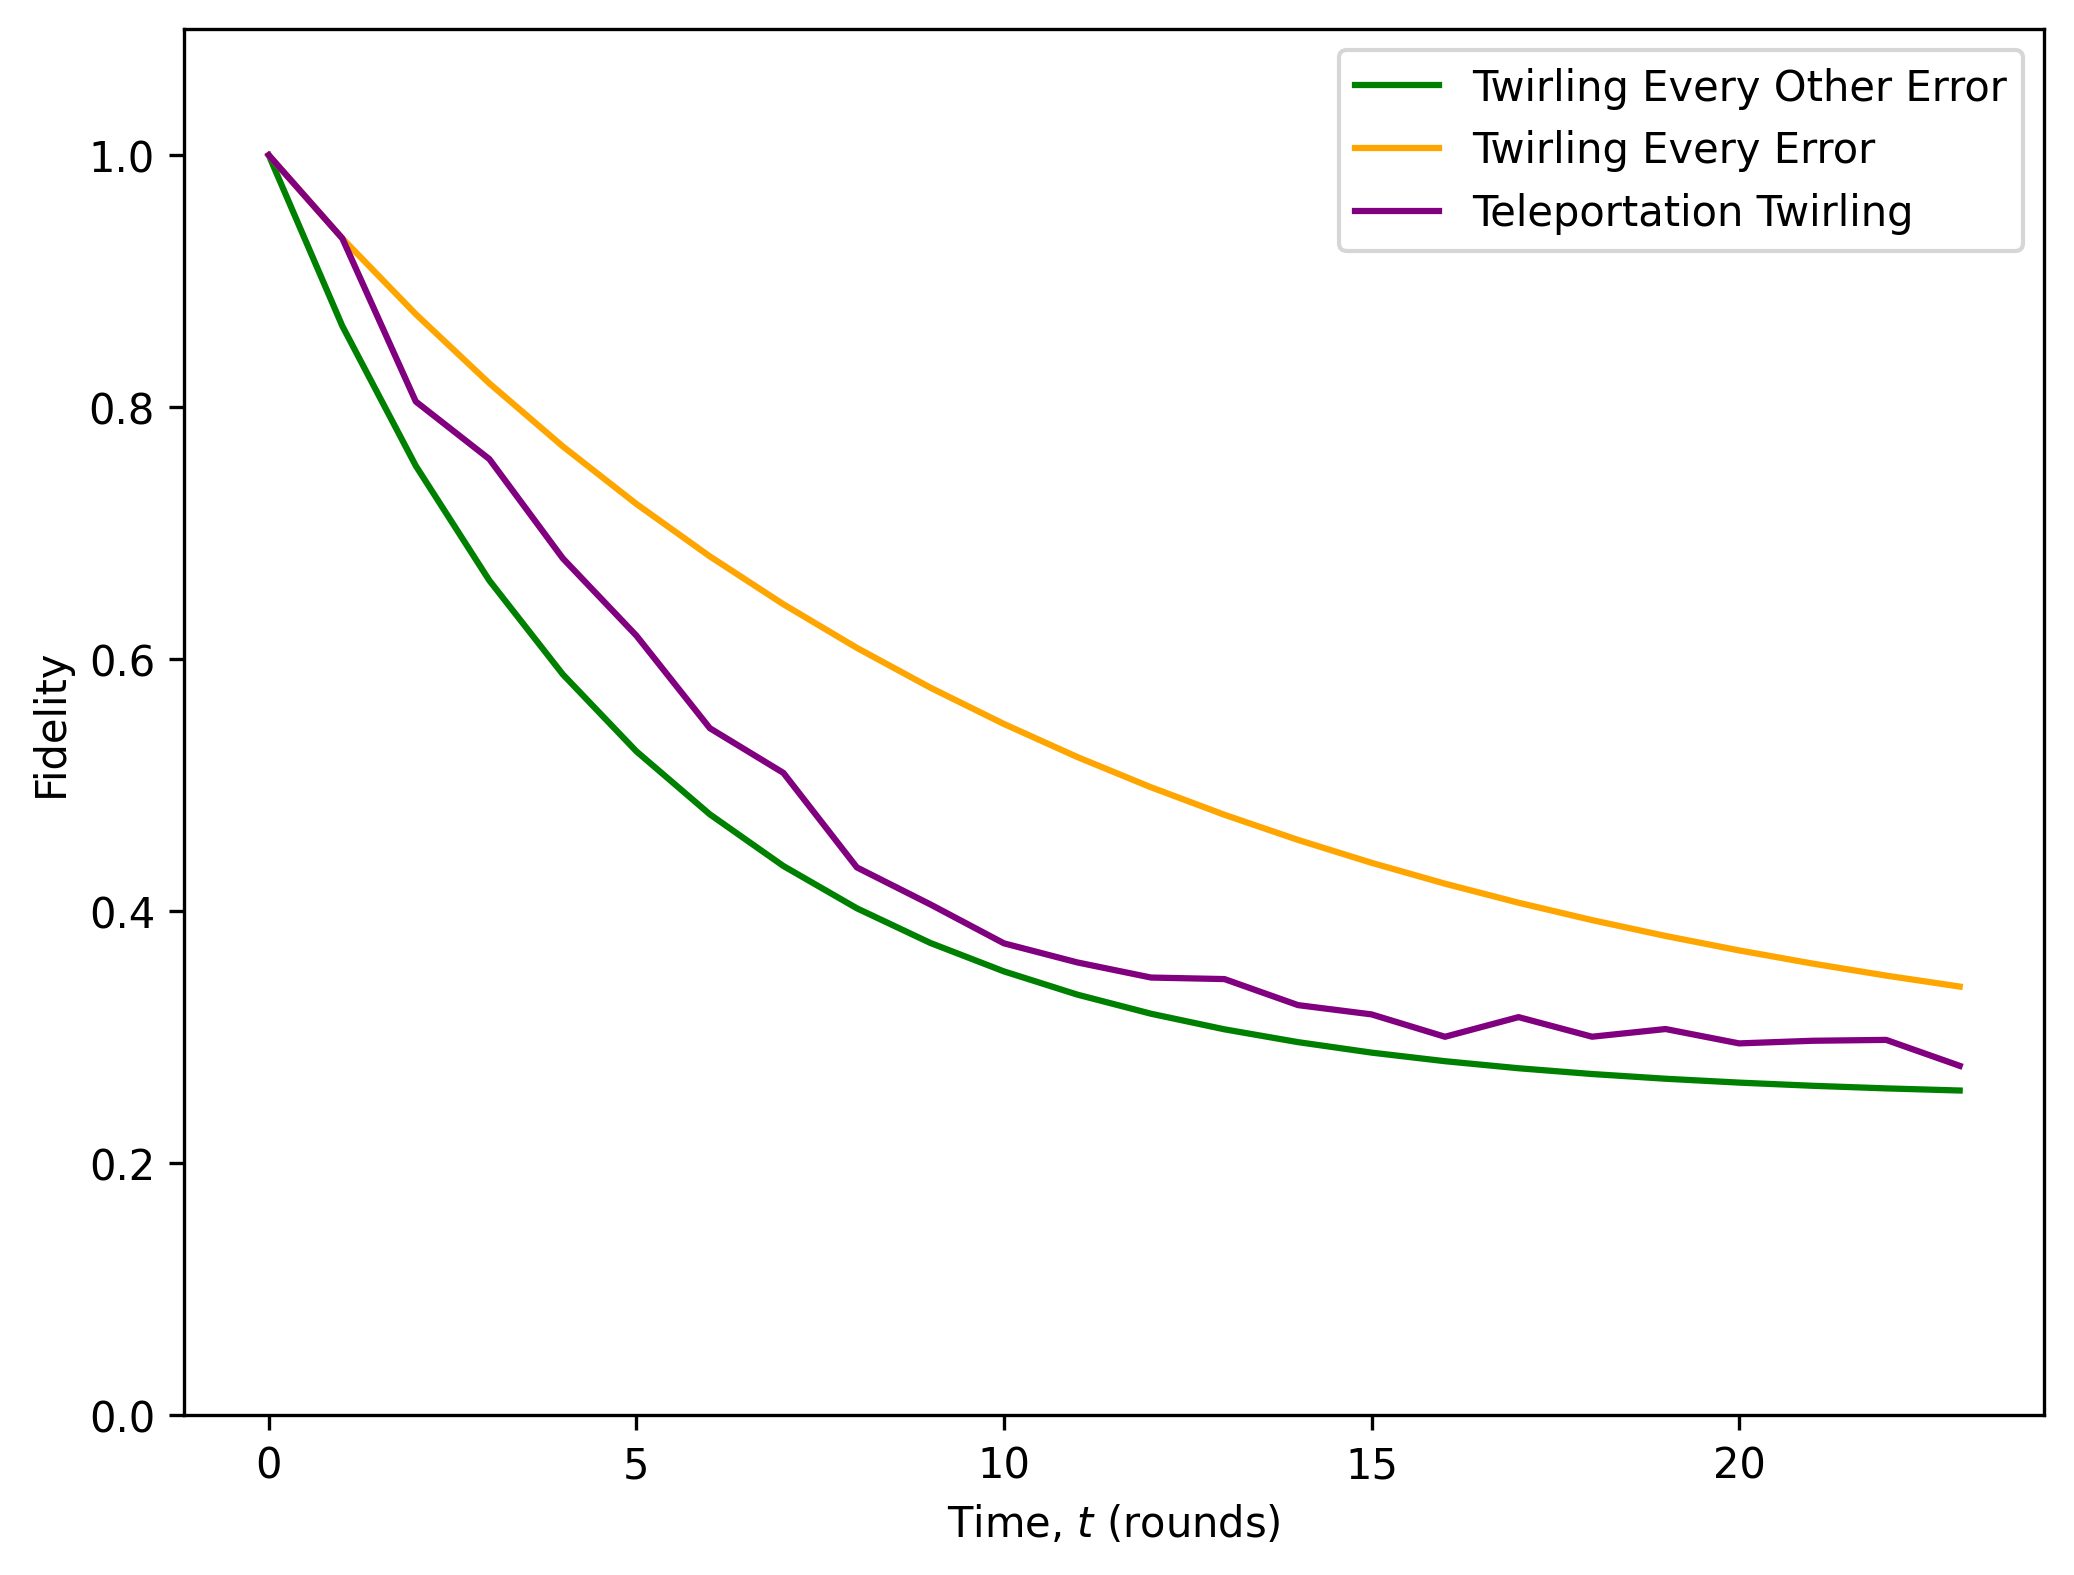

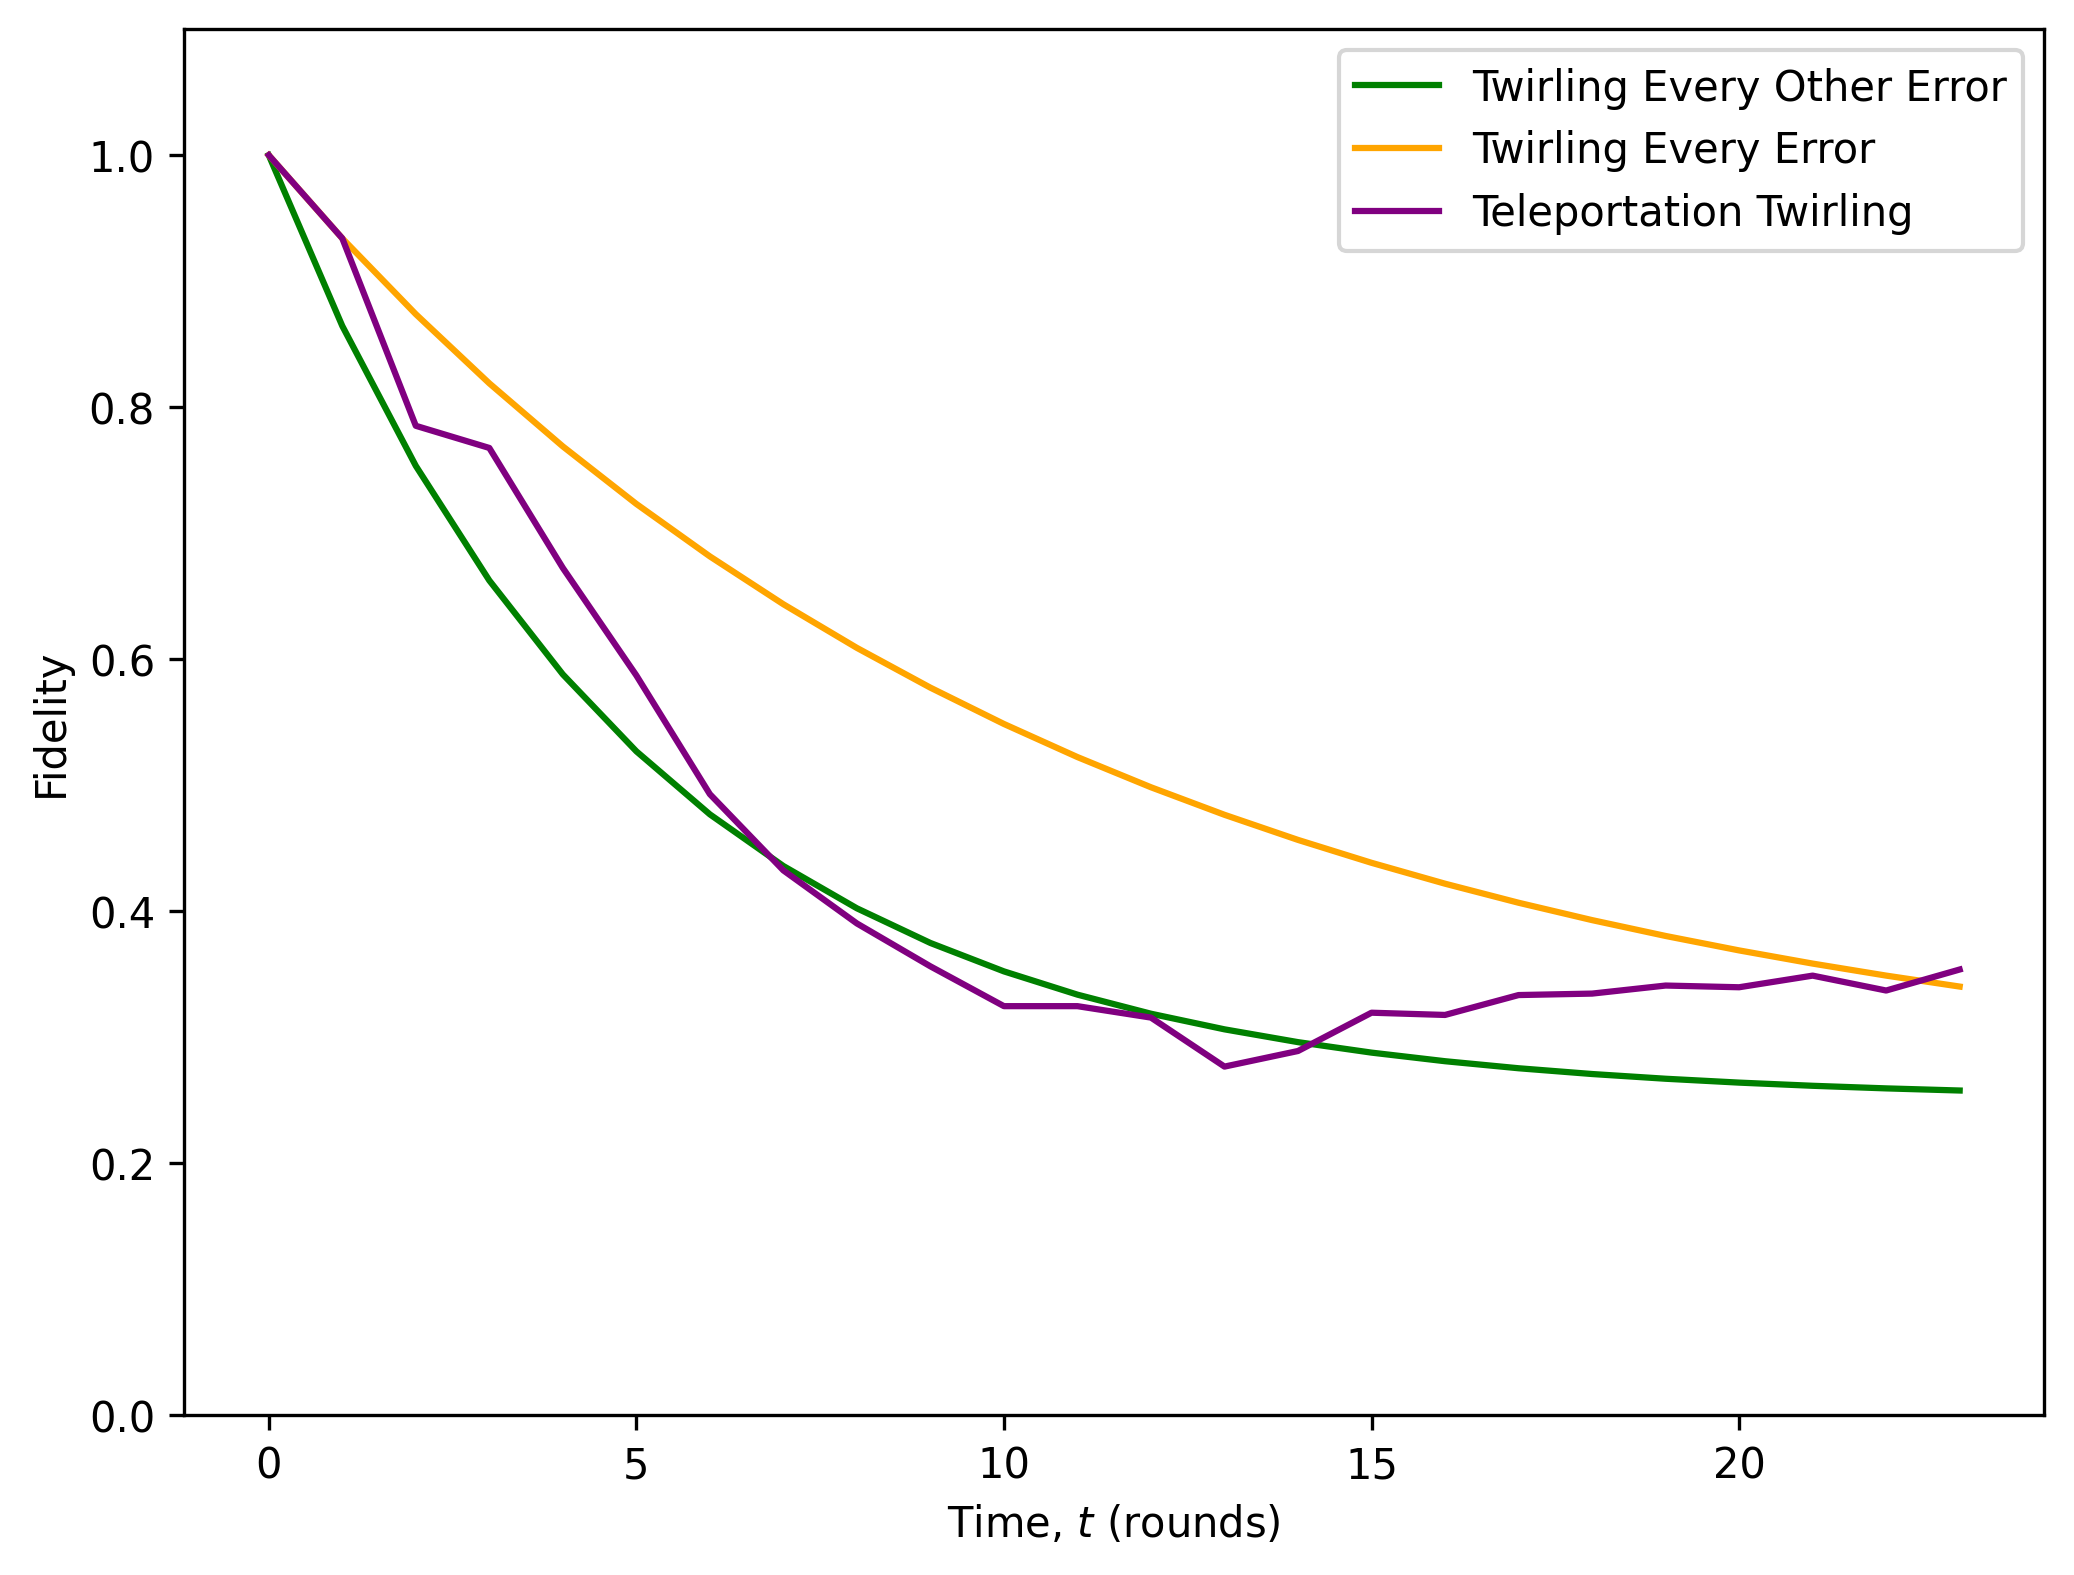

In [10]:

pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()+sigmaz())).expm(), probs={'Px' : 0.5,
               'Pz' : 0.5}, 
               t=24, proj_basis="Z", counter = 1000)
  
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), probs={'Px' : 0.6,
               'Pz' : 0.4}, 
               t=24, proj_basis="Z", counter = 1000) 
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), probs={'Px' : 0.7,
               'Pz' : 0.3}, 
               t=24, proj_basis="Z", counter = 1000) 
pauli_tele_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.15) * (sigmax()+sigmay()-sigmaz())).expm(), probs={'Px' : 0.8,
               'Pz' : 0.2}, 
               t=24, proj_basis="Z", counter = 1000)